# Final Project - Softmax Logistic Regression

## 1. Import data and libraries

In [1]:
# Name: Wenkang Su (ws1578), Tianbo Tan (tt1977)
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

import h5py
import math
import time
import os
import matplotlib.pyplot as plt # plotting utilities 
%matplotlib inline
import numpy as np 
import pandas as pd  # To read in the dataset we will use the Panda's library
print(os.listdir("./Input"))

#Import Fashion MNIST data
with h5py.File('./Input/images_training.h5','r') as H:  # Tranining sample
    data_train_f = np.copy(H['datatrain'])
with h5py.File('./Input/labels_training.h5','r') as H:  # Tranining label
    label_train_f = np.copy(H['labeltrain'])
with h5py.File('./Input/images_testing.h5','r') as H:  # Test sample
    data_test_f = np.copy(H['datatest'])
with h5py.File('./Input/labels_testing_2000.h5','r') as H:  # Test label
    label_test_f = np.copy(H['labeltest'])

data_test_f = data_test_f[:2000, :]    

#Iris dataset
df = pd.read_csv('iris.csv', header=None, names = ["sepal length[cm]","sepal width[cm]","petal length[cm]", "petal width", "label"])
df['label'] = df.label.map({'Iris-setosa': 0,
              'Iris-versicolor': 1,
              'Iris-virginica': 2})

names = ["sepal length[cm]","petal width"]

#After completing the assignment, try your code with all the features
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df[names],df['label'], test_size=0.1,random_state=0)

data_train=df_X_train.to_numpy()
data_test=df_X_test.to_numpy()
label_train=df_y_train.to_numpy()
label_test=df_y_test.to_numpy()


Using TensorFlow backend.


['images_training.h5', '.DS_Store', 'test', 'images_testing.h5', 'labels_testing_2000.h5', 'train', 'labels_training.h5']


## 2. Define functiosn

In [2]:
# Get the prediction for giving input
def getPredict(x,weight):
    prob = (np.exp(x.dot(weight)).T / np.sum(np.exp(x.dot(weight)), axis=1)).T # SoftMax Function
    predict = np.argmax(prob,axis=1)
    return predict

# Calculate the Accuracy
def getAccuracy(x,weight,label):
    predict = getPredict(x,weight)
    accuracy = sum(predict == label)/(float(len(label)))
    return accuracy

# Calculate the Loss and the Gradient 
def getLossNGrad(weight,data,label,hyper):
    m = data.shape[0]  # the number of the data size
    indicator = (np.arange(np.max(label) + 1) == label[:, None]).astype(float)  # 1 or 0
    weight_dot_x = np.dot(data,weight)
    prob = (np.exp(weight_dot_x).T / np.sum(np.exp(weight_dot_x), axis=1)).T # SoftMax Function
    loss = (-1/m)*np.sum(indicator * np.log(prob)) + (hyper/2)*np.sum(weight*weight)
    gradient = (-1/m)*np.dot(data.T,(indicator - prob)) + hyper*weight
    return loss,gradient


# Draw the chart of losses vs. iteration times
def Plot(i, losses):
    I = np.arange(i)
    I = I + 1
    fig, axis = plt.subplots()
    axis.plot(I,losses)
    axis.set_title('Softmax Regression')
    axis.set_xlabel('Numbers of Iterations')
    axis.set_ylabel('Loss')
    plt.show()

## 3. Run test

### 3.1 Iris dataset

Torlerance have been reached, iteration terminate! 
Iteration times: 417, Last step size: 9.867983874478625e-08, Last loss: 1.0377947097855018.
Run time: 0.08 s.
Training Accuracy:  68.14814814814815 %
Test Accuracy:  46.666666666666664 %


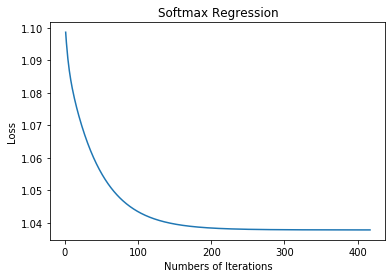

In [3]:
# This test with only regularization

# First, initialize weight with zeros.
weight = np.zeros([data_train.shape[1],np.max(label_train)+1])

time_start=time.time() # Test start time

#Define variables
hyper = 1           # Regularization hyperparameter 
maxit = 1000       # Max times of iterations
reltol = 1e-07      # Relative torlerance
abstol = 0.1       # Absolute torlerance
learningRate = 1e-2 # Learning rate
losses = []         # Record the loss
loss_new = 4
iter_times = 0

#Gradient Descent
for i in range(0,maxit):
    iter_times = iter_times + 1
    loss,grad = getLossNGrad(weight,data_train,label_train,hyper)
    losses.append(loss)
    weight = weight - (learningRate * grad)
    step_size = np.abs(loss_new - loss)
    loss_new = loss
    if step_size <= reltol or loss < abstol:
        print('Torlerance have been reached, iteration terminate! \nIteration times: {}, Last step size: {}, Last loss: {}.'.format(iter_times,step_size, loss))
        break
    elif iter_times == maxit:
        print('Max iteration times have been reached, iteration terminate! \nLast step size: {}, Last loss: {}.'.format(step_size, loss))
        break

#Calculate the Runtime and print all the results.
time_end=time.time()   # Test end time
print('Run time:',round(time_end-time_start,3),'s.')
print('Training Accuracy: ', getAccuracy(data_train, weight, label_train)*100,'%')
print('Test Accuracy: ', getAccuracy(data_test, weight, label_test)*100,'%')

#Plot the chart
Plot(iter_times, losses)

### 3.2 Fashion_MNIST dataset

Torlerance have been reached, iteration terminate! 
Iteration times: 76, Last step size: 9.91104031733414e-07, Last loss: 1.7406408042361021.
Run time: 25.348 s.
Training Accuracy:  66.53666666666666 %
Test Accuracy:  67.10000000000001 %


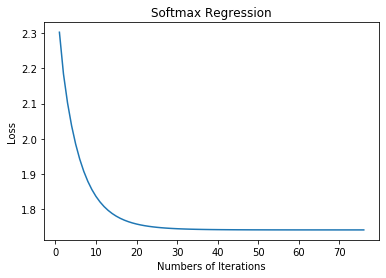

In [4]:
# This test with only regularization

# First, initialize weight with zeros.
weight = np.zeros([data_train_f.shape[1],np.max(label_train_f)+1])

time_start=time.time() # Test start time

#Define variables
hyper = 1           # Regularization hyperparameter
maxit = 1500       # Max times of iterations
reltol = 1e-06      # Relative torlerance
abstol = 0.25       # Absolute torlerance
learningRate = 5e-2 # Learning rate
losses = []         # Record the loss
loss_new = 4
iter_times = 0


#Gradient Descent
for i in range(0,maxit):
    iter_times = iter_times + 1
    loss,grad = getLossNGrad(weight,data_train_f,label_train_f,hyper)
    losses.append(loss)
    weight = weight - (learningRate * grad)
    step_size = np.abs(loss_new - loss)
    loss_new = loss
    if step_size <= reltol or loss < abstol:
        print('Torlerance have been reached, iteration terminate! \nIteration times: {}, Last step size: {}, Last loss: {}.'.format(iter_times,step_size, loss))
        break
    elif iter_times == maxit:
        print('Max iteration times have been reached, iteration terminate! \nLast step size: {}, Last loss: {}.'.format(step_size, loss))
        break


#Calculate the Runtime and print all the results.
time_end=time.time()   # Test end time
print('Run time:',round(time_end-time_start,3),'s.')
print('Training Accuracy: ', getAccuracy(data_train_f, weight, label_train_f)*100,'%')
print('Test Accuracy: ', getAccuracy(data_test_f, weight, label_test_f)*100,'%')

#Plot the chart
Plot(iter_times, losses)